1217070005 Agni Miftah Fauzi

In [1]:
!pip install nltk scikit-learn matplotlib

In [3]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize

import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

data_path = '/content/drive/MyDrive/Bahan Latihan ML/ISEAR.csv'
df = pd.read_csv(data_path, header=None)

print(df.head())

         0                                                  1    2
0      joy  On days when I feel close to my partner and ot...  NaN
1     fear  Every time I imagine that someone I love or I ...  NaN
2    anger  When I had been obviously unjustly treated and...  NaN
3  sadness  When I think about the short time that we live...  NaN
4  disgust  At a gathering I found myself involuntarily si...  NaN


In [9]:
col = [0, 1]
new_df = df.iloc[:, col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion', 'Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Text'].value_counts()
    for x_label, grp in _df_2.groupby('Emotion')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Emotion')
_ = plt.ylabel('Text')

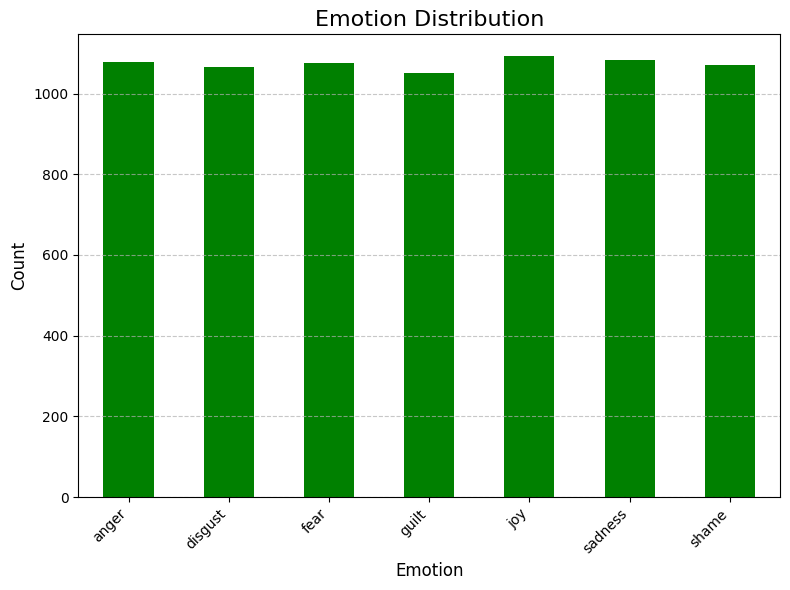

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

new_df.groupby('Emotion').Text.count().plot.bar(color='green', ylim=0)

plt.title('Emotion Distribution', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [11]:
new_df['Emotion']
new_df['Text']

def getTokenizedList(input_df):
  tokenizedList = []

  for i in range(0, len(input_df)):
    curText = input_df[1].iloc[i]
    curText = curText.replace('\n','')
    curTokenized = word_tokenize(curText)
    tokenizedList.append(curTokenized)

  tokenziedListWithoutPunct = []
  punctList = list(string.punctuation)

  for i in range(0, len(tokenizedList)):
    curList = tokenizedList[i]
    newList = []

    for word in curList:
      if (word.lower() not in punctList):
        newList.append(word.lower())
    tokenziedListWithoutPunct.append(newList)

  mystemmer = PorterStemmer()
  tokenziedStemmed = []

  for i in range(0, len(tokenziedListWithoutPunct)):
    curList = tokenziedListWithoutPunct[i]
    newList = []

    for word in curList:
      newList.append(mystemmer.stem(word))
    tokenziedStemmed.append(newList)
  return tokenziedStemmed

def transformSentence(sent):
  s = []
  sent = sent.replace('\n', '')
  sentTokenized = word_tokenize(sent)
  s.append(sentTokenized)
  sWithoutPunct = []
  punctList = list(string.punctuation)
  curSentList = s[0]
  newSentList = []

  for word in curSentList:
    if (word.lower() not in punctList):
      newSentList.append(word.lower())
  sWithoutPunct.append(newSentList)
  mystemmer = PorterStemmer()
  tokenziedStemmed = []

  for i in range(0, len(sWithoutPunct)):
    curList = sWithoutPunct[i]
    newList = []

    for word in curList:
      newList.append(mystemmer.stem(word))
    tokenziedStemmed.append(newList)
  return tokenziedStemmed

In [31]:
import pandas as pd

def getTokenizedList(df):
  tokenized_text = []
  for text in df['Text']:
    tokens = text.split()
    tokenized_text.append(tokens)
  return tokenized_text

df = pd.DataFrame({'Text': ['This is a sentence.', 'Another sentence here.']})
new_df = pd.DataFrame()
new_df['Text'] = getTokenizedList(df)

print(new_df)

                         Text
0    [This, is, a, sentence.]
1  [Another, sentence, here.]


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df['Text'], new_df['Emotion'], test_size=.3, random_state=1)

In [14]:
def returnPhrase(inputList):
    return inputList

In [37]:
myVectorizer = TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [38]:
curAlpha=0.33
NBClassifier = MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain, Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best ACC Naive Bayes')

# Print (curAlpha)
print(np.sum(myPredTest == Y_test)/len(Y_test))

Best ACC Naive Bayes
0.5121951219512195


In [17]:
print('metrics Classification report : Naive Bayes')
print (metrics.classification_report(Y_test, myPredTest))

metrics Classification report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.41      0.43      0.42       331
     disgust       0.65      0.46      0.54       324
        fear       0.58      0.66      0.62       311
       guilt       0.34      0.52      0.41       299
         joy       0.61      0.59      0.60       323
     sadness       0.66      0.54      0.59       351
       shame       0.45      0.40      0.42       316

    accuracy                           0.51      2255
   macro avg       0.53      0.51      0.51      2255
weighted avg       0.53      0.51      0.52      2255



In [18]:
myVectorizer = TfidfVectorizer(analyzer='word', tokenizer = returnPhrase, preprocessor = returnPhrase, token_pattern = None, ngram_range = (1,3))
myVectorizer.fit(X_train)
transformedTrain = myVectorizer.transform(X_train).toarray()
transformedTest = myVectorizer.transform(X_test).toarray()

In [39]:
curC = 2
SVMClassifier = svm.LinearSVC(C = curC)
SVMClassifier.fit(transformedTrain, Y_train)
myPredTest = SVMClassifier.predict(transformedTest)
print ('Best ACC SVM')

print (np.sum(myPredTest == Y_test)/len(Y_test))

Best ACC SVM
0.5627494456762749


In [20]:
print ('metrics Classification Report : SVM')
print (metrics.classification_report(Y_test, myPredTest))

metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.47      0.44      0.46       331
     disgust       0.60      0.58      0.59       324
        fear       0.68      0.68      0.68       311
       guilt       0.46      0.48      0.47       299
         joy       0.64      0.69      0.66       323
     sadness       0.61      0.64      0.63       351
       shame       0.45      0.42      0.43       316

    accuracy                           0.56      2255
   macro avg       0.56      0.56      0.56      2255
weighted avg       0.56      0.56      0.56      2255



In [40]:
def predictSentNB (sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [41]:
def predictSentSVM (sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

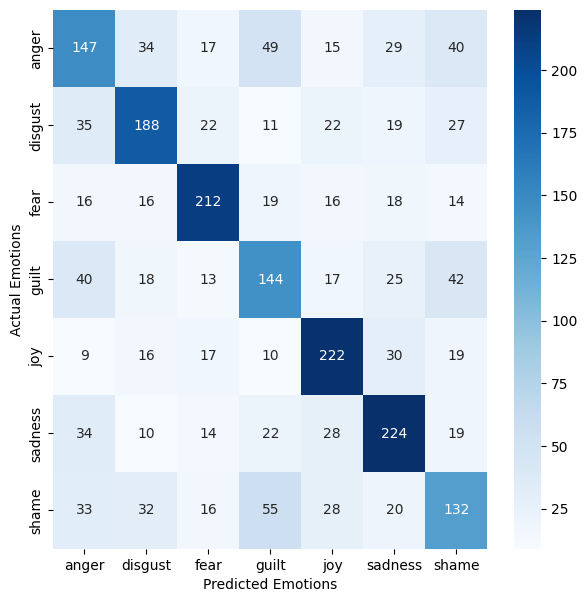

In [26]:
# Printing the Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
cm = confusion_matrix(Y_test, myPredTest, labels = labels)

# Print (cm)
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, fmt = 'd',
            xticklabels = labels, yticklabels = labels, cmap = 'Blues')
plt.ylabel ('Actual Emotions')
plt.xlabel ('Predicted Emotions')
plt.show()